<a href="https://colab.research.google.com/github/Keerthykannan/Market-campaign-Analysis/blob/main/marketing_Campaign_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marketing campaigns are sets of strategic activities that promote a business’s goal or
objective.Marketing campaign analysis helps to build new strategies 

**Dataset:**The data set marketing_data.csv consists personal details,purchase details,campaign details of 2,240 customers. 

**Personal details** includes income,education etc.
In **purchase details** we have the details of amount spend for diffrent products and number of purchase made through diffrent channels(website,store,catlog,discount)

we have details of 5 campaigns,in which 1 represent customer accepted the offer in the corresponding campaign, 0 otherwise

Target column is **Response**:1if customer accepted the offer in the last campaign, 0 otherwise





## **Importing Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


## **Overview of the dataset**

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv',delimiter=';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.shape

(2240, 29)

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

null values in income column

In [ ]:
numerical_col=['Year_Birth','Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain','Z_CostContact','Z_Revenue']


In [ ]:
data[numerical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


In [ ]:

categ_col=['Education', 'Marital_Status']
for i in categ_col:
      print(data[i].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In education, 2n cycle and Master means the same thing. We can combine these two categories.

In Marital_status we combine the category 'Alone' with 'Single'.
and combain'Absurd', and 'YOLO'to make a new category - 'Others'.

In [ ]:
data["Education"].replace("2n Cycle", "Master", inplace=True)
data["Marital_Status"].replace(['Absurd','YOLO'],'others',inplace=True)
data['Marital_Status'].replace('Alone','Single',inplace=True)



In [ ]:
data['Income'].fillna(data.Income.mean(), inplace=True)

In [ ]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# **EDA**

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## To check the distribution of income and observations on percentage purchases from different channels 

Text(0.5, 1.0, 'Income distribution')

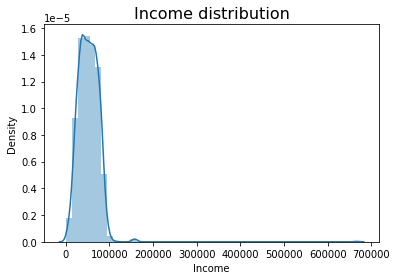

In [ ]:
sns.distplot(data['Income'])
plt.title('Income distribution', size=16, )

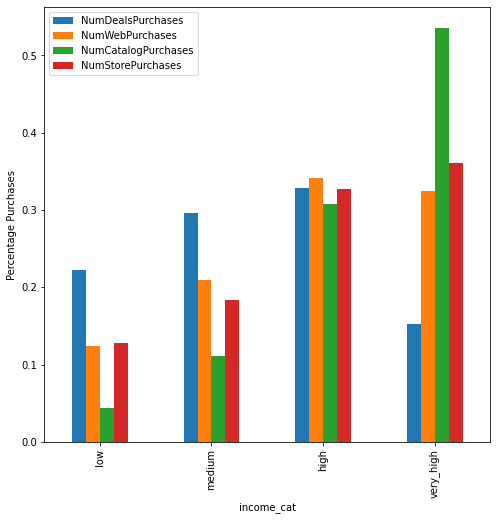

In [ ]:
#Binning the income column
data['income_cat']=pd.qcut(data.Income, q=[0, 0.25, 0.50, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])
channel_cols = [col for col in data.columns if 'Purchases' in col] 
group=data.groupby('income_cat').sum()[channel_cols]
(group/group.sum()).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage Purchases")
plt.show()


The high-income customers made more than 50% of their purchases using catalog (buying goods to be shipped through the mail) and made lowest purchase using discount

 Low-income customers rank high in the number of purchases made with discounts, whereas low-income customers make the lowest purchases through the catalog.

 Medium income customers made the highest numbers of the purchase via discount

## To check the correlation between income and purchase through diffrent channels

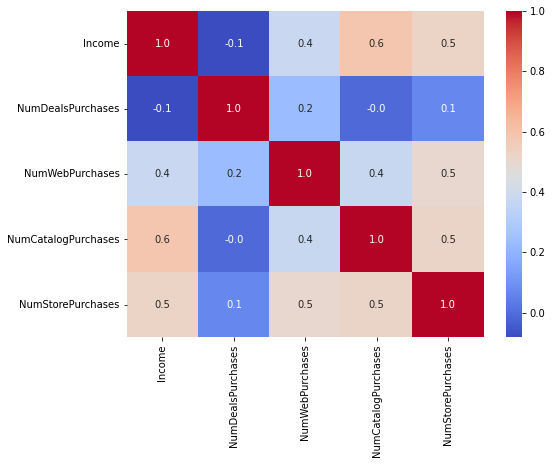

In [ ]:
corr=data[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()

#Write your code here
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)


NumStorePurchase & NumCatalog purchases show a high positive correlation with customer income (0.7). The customers with high income are most likely to make the highest number of purchases via 'in stores' and 'catalog.'

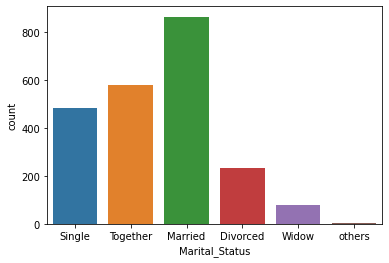

In [ ]:
sns.countplot('Marital_Status',data=data)

majority of customer belong to married category

creating new features to get overll picture of a customer, how much he/she has spend

In [ ]:
# total spending by a customer
spending = [col for col in data.columns if 'Mnt' in col]
data['Total_Spending'] = data[spending].sum(axis = 1) 

#total purchases made by a customer
platform_col = [col for col in data.columns if 'Purchases' in col]
data['Total_Purchase'] = data[platform_col].sum(axis = 1) 



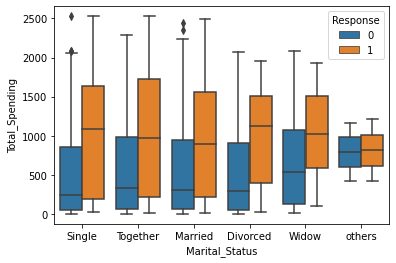

In [ ]:
sns.boxplot('Marital_Status','Total_Spending',data=data,hue='Response')

## To Check the product preferences by customers

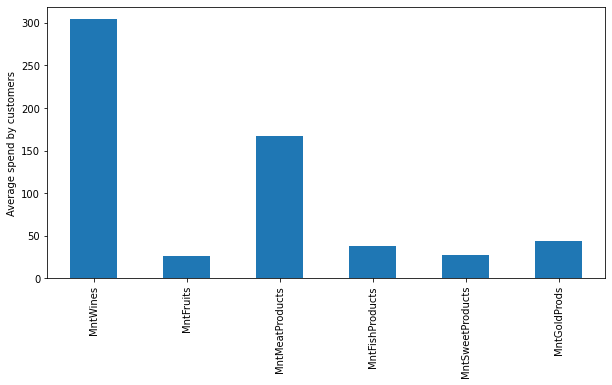

In [ ]:
mnt_cols = [col for col in data.columns if 'Mnt' in col]

spending=data[mnt_cols].mean(axis=0)
spending.plot(kind='bar', figsize=(10,5))
plt.ylabel("Average spend by customers")
plt.show()



The mean amount spent by customers in the last 2 years is highest for wines followed by meat products.

Amount spend for fruits and sweet is least.


## To check the percentage of purchase through diffrent channels

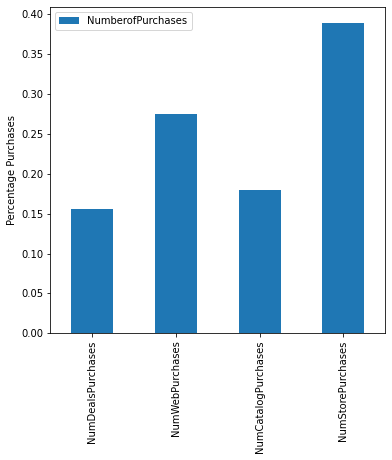

In [ ]:
# list of cols for channels

channel_cols = [col for col in data.columns if 'Purchases' in col] 

#making dataframe of columns having purchase and taking sum of them.
channels = pd.DataFrame(data[channel_cols].sum()/data.Total_Purchase.sum(), columns=['NumberofPurchases'])

# plot
channels.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage Purchases")
plt.show()


We can see that the most purchases are from the stores followed by web purchases.
Number of deal purchases and catalog purchases are low.

## To find the acceptance rate for each campaign


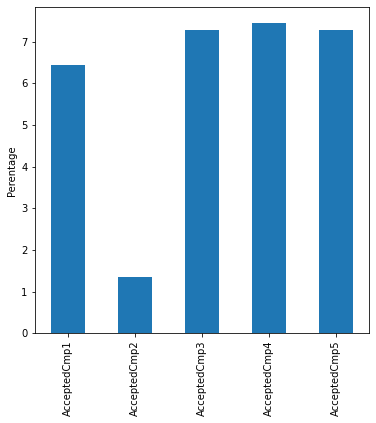

In [ ]:
# PLotting the % acceptance for every campaign

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

success_campaign=(data[Camp_cols].sum()/data.shape[0])*100

# plot
success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Perentage")
plt.show()

The acceptance rate for the campaign "AcceptedCmp4" is around 7.5 %

The acceptance rate for the campaign "AcceptedCmp3" is around 7.3 %

The acceptance rate for the campaign "AcceptedCmp5" is around 7.3 % 

The acceptance rate for the campaign "AcceptedCmp1" is around 6.5 %

The acceptance rate for the campaign "AcceptedCmp2" is around 1.5 % 

In [ ]:
 data.drop(['ID','income_cat','Total_Spending', 'Total_Purchase','Z_CostContact','Z_Revenue','Dt_Customer'],inplace=True,axis=1)

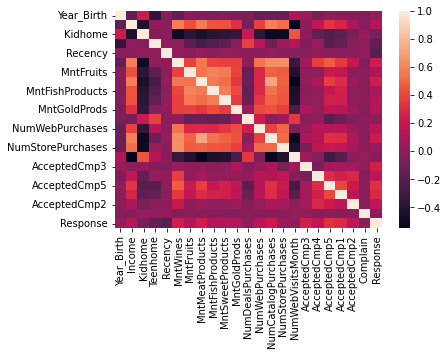

In [ ]:
sns.heatmap(data.corr())

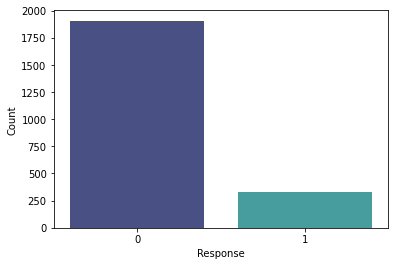

In [ ]:
Response = data.loc[:,"Response"].value_counts().rename('Count')
response=data['Response'].value_counts()
plt.xlabel("Response")
plt.ylabel('Count')
sns.barplot(Response.index , Response.values,palette="mako")

Given dataset is imbalenced 

## **LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in categ_col:
          data[i]=label.fit_transform(data[i])


In [ ]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'],
      dtype='object')

In [ ]:
data.dtypes

Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

**splitting the data into input labels and output labels**

In [ ]:
y = data['Response']
X = data.drop('Response', axis=1)

# SMOTE

In [ ]:
#synthetic minority oversample technique
from imblearn.over_sampling import SMOTE 
oversample=SMOTE()
X,y=oversample.fit_resample(X,y)
y.value_counts()


1    1906
0    1906
Name: Response, dtype: int64

#Train_Test_split 

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
                                    

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# **KNN model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,Y_train)
y_pred_knn=model_knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_knn))


              precision    recall  f1-score   support

           0       0.92      0.77      0.84       572
           1       0.80      0.93      0.86       572

    accuracy                           0.85      1144
   macro avg       0.86      0.85      0.85      1144
weighted avg       0.86      0.85      0.85      1144



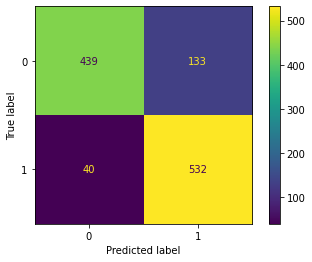

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(Y_test,y_pred_knn))

# SVM model

In [ ]:
from sklearn.svm import SVC
model_svm=SVC(kernel='linear')
model_svm.fit(X_train,Y_train)
y_pred_svm=model_svm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       572
           1       0.78      0.81      0.80       572

    accuracy                           0.79      1144
   macro avg       0.79      0.79      0.79      1144
weighted avg       0.79      0.79      0.79      1144



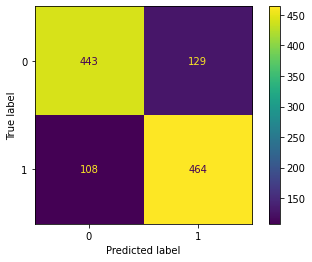

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(Y_test,y_pred_svm))

# DecisionTree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(criterion='entropy')
model_tree.fit(X_train,Y_train)
y_pred_dt=model_tree.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       572
           1       0.83      0.84      0.84       572

    accuracy                           0.83      1144
   macro avg       0.83      0.83      0.83      1144
weighted avg       0.83      0.83      0.83      1144



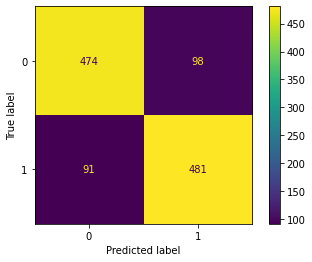

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(Y_test,y_pred_dt))

# RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=5,criterion='entropy')
model_rf.fit(X_train,Y_train)
y_pred_rf=model_rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       572
           1       0.85      0.90      0.88       572

    accuracy                           0.87      1144
   macro avg       0.87      0.87      0.87      1144
weighted avg       0.87      0.87      0.87      1144



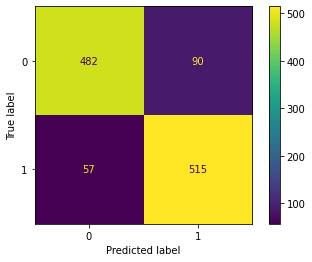

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(Y_test,y_pred_rf))

# **Stacking Classifier**

In [ ]:
#base models
clf = [('knn',model_knn),('svm',model_svm),('DT',model_tree),('RF',model_rf)] #list of (str, estimator)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr,cv=5)
stack_model.fit(X_train,Y_train)
y_pred_stack=stack_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_stack))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       572
           1       0.89      0.90      0.89       572

    accuracy                           0.89      1144
   macro avg       0.89      0.89      0.89      1144
weighted avg       0.89      0.89      0.89      1144



In [ ]:
results=pd.DataFrame()
results['model']=['KNN','SVM','Decision_tree','Random_forest','Stacking']
results['accuracy_score']=[accuracy_score(Y_test,y_pred_knn),accuracy_score(Y_test,y_pred_svm),accuracy_score(Y_test,y_pred_dt),accuracy_score(Y_test,y_pred_rf),accuracy_score(Y_test,y_pred_stack)]
results 

,model,accuracy_score
0,KNN,0.848776
1,SVM,0.792832
2,Decision_tree,0.834790
3,Random_forest,0.871503
4,Stacking,0.892483


Accuracy of stacking model is higher than that of other models

# ** Hyperparameter tuning**

To find best hyperparameters for diffrent models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
n_neighbors = range(1, 21, 2)
metric = ['euclidean', 'manhattan', 'minkowski']
random_knn=dict(n_neighbors=n_neighbors,metric=metric)
random_search_knn = RandomizedSearchCV(estimator=model_knn, param_distributions=random_knn, n_iter=5, cv=5, scoring='accuracy',error_score=0)
knn_result = random_search_knn.fit(X_train, Y_train)
print('Best Score: %s' % knn_result.best_score_)
print('Best Hyperparameters: %s' % knn_result.best_params_)

Best Score: 0.8538201544504641
Best Hyperparameters: {'n_neighbors': 1, 'metric': 'euclidean'}


In [ ]:
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
random_svm = dict(kernel=kernel,C=C)
random_search_svm = RandomizedSearchCV(estimator=model_svm, param_distributions=random_svm, n_iter=5, cv=5, scoring='accuracy',error_score=0)
svm_result = random_search_svm.fit(X_train, Y_train)
# summarize results
print('Best Score: %s' % svm_result.best_score_)
print('Best Hyperparameters: %s' % svm_result.best_params_)

Best Score: 0.8586960951718419
Best Hyperparameters: {'kernel': 'poly', 'C': 10}


In [ ]:
max_depth=[3,5,7,10,15]
criterion=['gini','entropy']
random_tree = dict(max_depth=max_depth,criterion=criterion)
random_search_tree = RandomizedSearchCV(estimator=model_tree, param_distributions=random_tree, n_iter=5, cv=5, scoring='accuracy',error_score=0)
dt_result = random_search_tree.fit(X_train, Y_train)
# summarize results
print('Best Score: %s' % dt_result.best_score_)
print('Best Hyperparameters: %s' % dt_result.best_params_)


Best Score: 0.8444456155883943
Best Hyperparameters: {'max_depth': 15, 'criterion': 'entropy'}


In [ ]:
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
random = dict(n_estimators=n_estimators,max_features=max_features)
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=random, n_iter=5, cv=5, scoring='accuracy',error_score=0)
rcv_result = random_search.fit(X_train, Y_train)
# summarize results
print('Best Score: %s' % rcv_result.best_score_)
print('Best Hyperparameters: %s' % rcv_result.best_params_)

Best Score: 0.9126722459964445
Best Hyperparameters: {'n_estimators': 1000, 'max_features': 'sqrt'}


In [ ]:
model_knn_1=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
model_svm_1=SVC(kernel='poly',C=10)
model_tree_1=DecisionTreeClassifier(criterion='entropy',max_depth= 15)
model_rf_1=RandomForestClassifier(n_estimators=1000,max_features='sqrt')


In [ ]:
clf = [('knn',model_knn_1),('svm',model_svm_1),('DT',model_tree_1),('RF',model_rf_1)] #list of (str, estimator)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr,cv=5)
stack_model.fit(X_train,Y_train)
y_pred_stack_1=stack_model.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,y_pred_stack_1))



0.9213286713286714


By fitting the base models with best hyperparameters we obtained a stacking model with accuracy 92.13%